<a href="https://www.kaggle.com/code/hanpat99/indian-liver-patients-classification?scriptVersionId=132922685" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

This is a take home project from IIT Roorkee for testing Advanced Machine Learning Algorithms on Indian Liver Patient Dataset.

## Problem Statement
Download the Liver patient data from the following source:

https://www.kaggle.com/uciml/indian-liver-patient-records

Use the following 07 features from this dataset:
* Age; 
* Total_Bilirubin; 
* Direct_Bilirubin; 
* Alkaline_Phosphotase;
* Alamine_Aminotransferase;
* Total_Protiens; 
* Albumin

Your task is to predict whether a patient suffers from a liver disease using above
features. Split your data into test and train.
First use a random forest algorithm for performing this task.
Then, use a Adaboost Classifier to perform similar task.
Compare the accuracy of these two algorithms.

# 2.0.1 Dataset context

The Indian Liver Patients Dataset is generated from a study done on liver patients in the North East region of Andhra Pradesh, India. This region, where I come from, sees a high rate of alcohol abuse, which is a leading cause of liver health issues. 

This region also typically sees males consuming more alcohol than females, so we may expect to see a higher prevalance of liver disorders among males than in females. The feature descriptions are self-explanatory, so let's dive into the addressing the problem at hand.

The problem relates to predicting whether a subject suffers from a liver disease, based on liver function diagnostic results. There are 167 healthy subjects and 416 patients in this dataset, encoded as 2 & 1, respectively. I will train and compare the performances of two different Advanced Machine Learning Classifiers - AdaBoostClassifier and RandomForestClassifier, for this purpose.

# 2.0.2 Workflow:



1. Loading the dataset
2. Exploratory Data Analysis, Missing Values handling, Feature Engineering
3. Model Training, Hyperparameter Tuning and Evaluation
4. Conclusion: Comparison of Estimators




# 2.1 Import block and loading the dataset


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set plot style
#sns.set(color_codes=True)
%matplotlib inline
plt.rcParams['figure.figsize']=15,8
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
liv = pd.read_csv('/kaggle/input/indian-liver-patient-records/indian_liver_patient.csv')

In [5]:
liv.rename(columns = {'Dataset':'liver_disease_YN'}, inplace =True)

In [6]:
df = liv.copy()

# 2.2 Exploratory Data Analysis, Feature Engineering

In [7]:
print(df.duplicated().sum())
df = df.drop_duplicates().reset_index().drop('index', axis = 1)

13


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    int64  
 1   Gender                      570 non-null    object 
 2   Total_Bilirubin             570 non-null    float64
 3   Direct_Bilirubin            570 non-null    float64
 4   Alkaline_Phosphotase        570 non-null    int64  
 5   Alamine_Aminotransferase    570 non-null    int64  
 6   Aspartate_Aminotransferase  570 non-null    int64  
 7   Total_Protiens              570 non-null    float64
 8   Albumin                     570 non-null    float64
 9   Albumin_and_Globulin_Ratio  566 non-null    float64
 10  liver_disease_YN            570 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 49.1+ KB


In [9]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease_YN
count,570.000,570.000,570.000,570.000,570.000,570.000,570.000,570.000,566.000,570.000
mean,44.849,3.322,1.498,291.751,79.728,109.381,6.496,3.149,0.948,1.288
std,16.242,6.268,2.833,245.292,181.472,290.881,1.088,0.797,0.320,0.453
min,4.000,0.400,0.100,63.000,10.000,10.000,2.700,0.900,0.300,1.000
25%,33.000,0.800,0.200,176.000,23.000,25.000,5.800,2.600,0.700,1.000
50%,45.000,1.000,0.300,208.000,35.000,41.000,6.600,3.100,0.950,1.000
75%,58.000,2.600,1.300,298.000,60.000,86.750,7.200,3.800,1.100,2.000
max,90.000,75.000,19.700,2110.000,2000.000,4929.000,9.600,5.500,2.800,2.000


In [10]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
liver_disease_YN              0
dtype: int64

In [11]:
missing_df = df[df['Albumin_and_Globulin_Ratio'].isna()]
missing_df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease_YN
196,45,Female,0.900,0.300,189,23,33,6.600,3.900,NaN,1
228,51,Male,0.800,0.200,230,24,46,6.500,3.100,NaN,1
240,35,Female,0.600,0.200,180,12,15,5.200,2.700,NaN,2
299,27,Male,1.300,0.600,106,25,54,8.500,4.800,NaN,2


#### I'll encode the Gender feature and impute missing values in the Albumin_and_Globulin_Ratio.

In [12]:
target_replace_dict = {1:1, 2:0}
df['liver_disease_YN'].replace(target_replace_dict, inplace = True)

In [13]:
df[df.liver_disease_YN == 0].groupby('Gender')['Albumin_and_Globulin_Ratio'].median()

Gender
Female   1.000
Male     1.000
Name: Albumin_and_Globulin_Ratio, dtype: float64

In [14]:
df[df.liver_disease_YN == 1].groupby('Gender')['Albumin_and_Globulin_Ratio'].median()

Gender
Female   0.900
Male     0.900
Name: Albumin_and_Globulin_Ratio, dtype: float64

In [15]:
median_AG_ratio_by_gender = df.groupby('Gender')['Albumin_and_Globulin_Ratio'].median()
median_AG_ratio_by_gender

Gender
Female   0.900
Male     0.960
Name: Albumin_and_Globulin_Ratio, dtype: float64

In [16]:
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(df['Gender'].map(median_AG_ratio_by_gender))

In [17]:
df.skew()

Age                          -0.047
Total_Bilirubin               4.869
Direct_Bilirubin              3.188
Alkaline_Phosphotase          3.728
Alamine_Aminotransferase      6.695
Aspartate_Aminotransferase   10.559
Total_Protiens               -0.311
Albumin                      -0.061
Albumin_and_Globulin_Ratio    1.006
liver_disease_YN             -0.940
dtype: float64

In [18]:
df.liver_disease_YN.value_counts() ## 406 patients, 164 healthy

1    406
0    164
Name: liver_disease_YN, dtype: int64

In [19]:
gender_replace_dict = {'Male':0, 'Female':1}
df.replace(gender_replace_dict, inplace = True)

#### Some features like Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase are heavily skewed to the right, probably due to outliers. Lets log-normalize these features to improve model performance.

Skewness of log transformed features:
log_Total_Bilirubin :	 1.7314383064442538
log_Direct_Bilirubin :	 1.6895992041699643
log_Alkaline_Phosphotase :	 1.3263973386022474
log_Alamine_Aminotransferase :	 1.4706642266392174
log_Aspartate_Aminotransferase :	 1.246183035226113


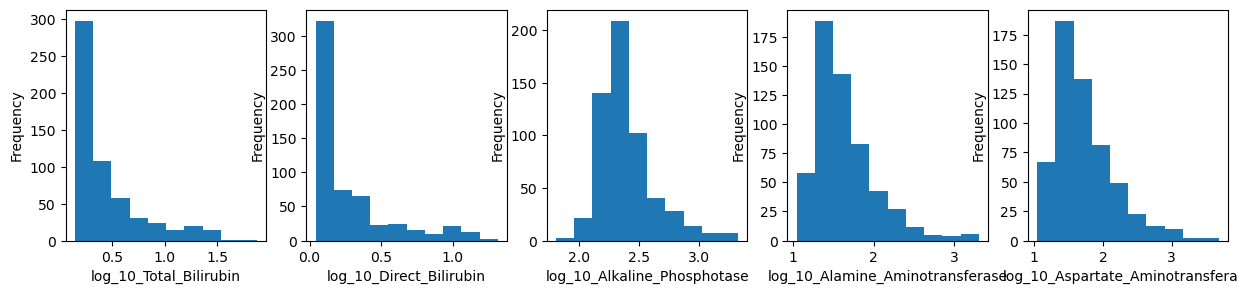

In [20]:
## Adding new log transformed features and visualizing their distributions

skewed_features = ['Total_Bilirubin',\
                   'Direct_Bilirubin', \
                   'Alkaline_Phosphotase', \
                   'Alamine_Aminotransferase', \
                   'Aspartate_Aminotransferase']

fig = plt.figure(figsize=(15,3))

print('Skewness of log transformed features:')
for idx, feature in enumerate(skewed_features):
    new_name = f'log_{feature}'
    df[new_name] = np.log10(df[feature]+1) #add 1 to features with 0 values to prevent -np.inf during log transform  
    print(new_name, ':\t', df[new_name].skew())

    sub = fig.add_subplot(1,5,idx+1) 
    sub.set_xlabel(f'log_10_{feature}')
    df[new_name].plot(kind='hist')

In [21]:
df.drop(skewed_features, axis = 1, inplace= True)

# 2.2.1 Univariate Analysis

In [22]:
df.columns

Index(['Age', 'Gender', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'liver_disease_YN', 'log_Total_Bilirubin',
       'log_Direct_Bilirubin', 'log_Alkaline_Phosphotase',
       'log_Alamine_Aminotransferase', 'log_Aspartate_Aminotransferase'],
      dtype='object')

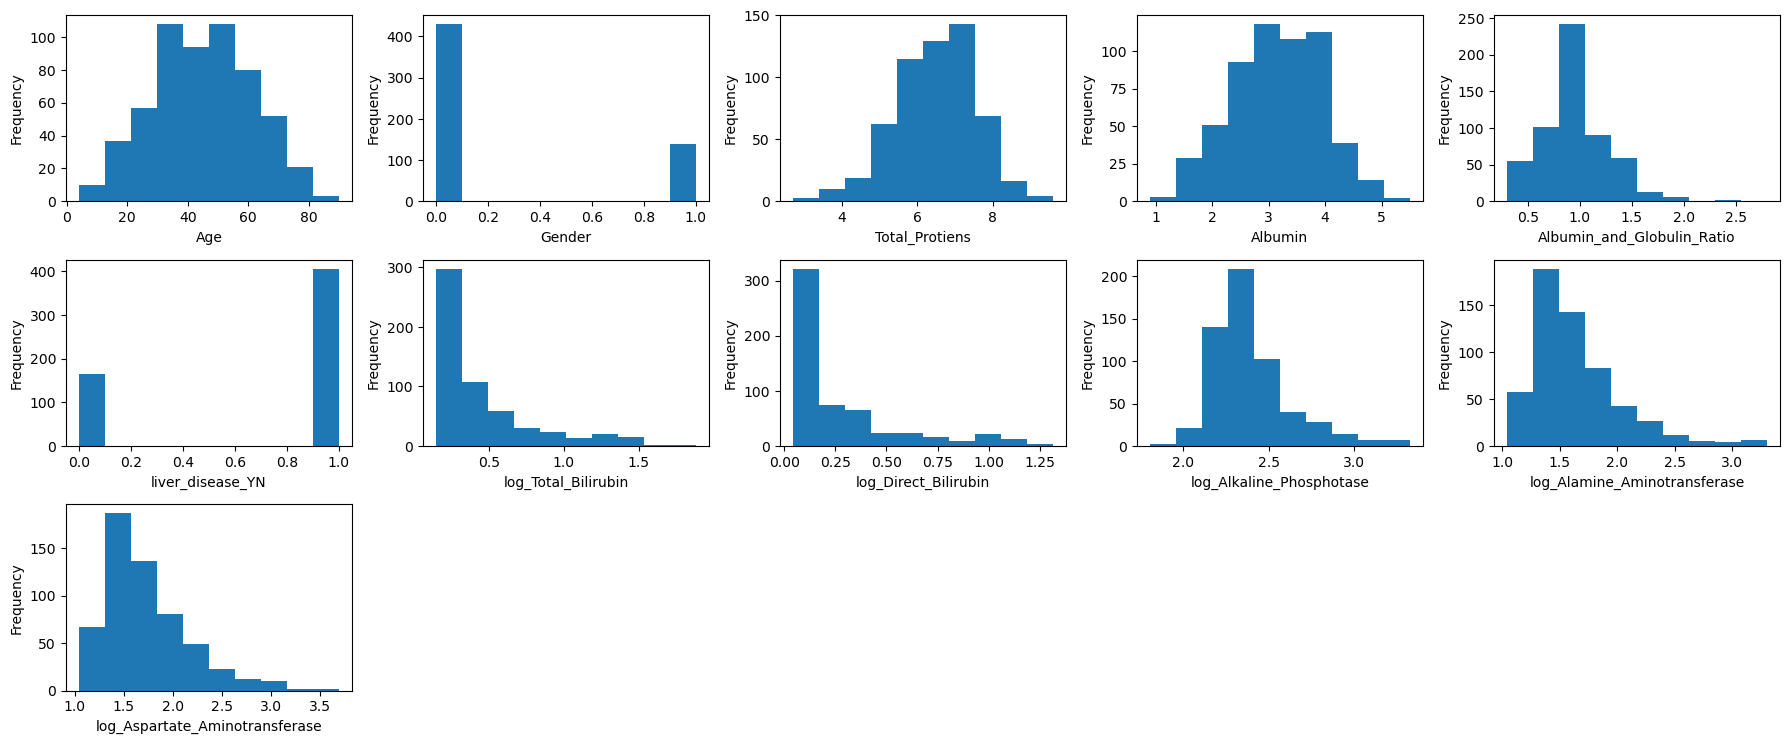

In [23]:
## Lets visualize the distributions of our features

fig = plt.figure(figsize = (18,12))

for idx, feature in enumerate(df.columns):
    sub = fig.add_subplot(5,5,idx+1)
    sub.set_xlabel(feature)
    df[feature].plot(kind='hist')
    plt.tight_layout()


#### This is interesting. The following observations can be made from these plots.


1.   The median age of the participants is in the late 30s to early 40s range.
2.   More males have participated than females in the Liver health study. 
3. My initial hypothesis was that males in this geographical region have been facing higher amount of liver issues. Let's find out if this is the case in the next set of visualizations.
4. We do not have baseline values for healthy people in the dataset's Kaggle page, nor in the feature descripion. I will attempt to find this out using the groupby function for healthy livers (df.liver_disease_YN == 0).

In [24]:
## Artificial Baseline, Mean (not verified against medical standards)
baseline_avg = df[df.liver_disease_YN == 0].groupby('Gender').mean()
baseline_avg

,Age,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease_YN,log_Total_Bilirubin,log_Direct_Bilirubin,log_Alkaline_Phosphotase,log_Alamine_Aminotransferase,log_Aspartate_Aminotransferase
Gender,,,,,,,,,,
0,40.678,6.544,3.358,1.043,0.000,0.317,0.138,2.314,1.492,1.554
1,42.837,6.600,3.357,1.009,0.000,0.266,0.092,2.279,1.409,1.451


In [25]:
df[df.liver_disease_YN == 1].groupby('Gender').mean()

,Age,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease_YN,log_Total_Bilirubin,log_Direct_Bilirubin,log_Alkaline_Phosphotase,log_Alamine_Aminotransferase,log_Aspartate_Aminotransferase
Gender,,,,,,,,,,
0,47.108,6.406,3.016,0.912,1.000,0.550,0.347,2.420,1.744,1.850
1,43.385,6.692,3.233,0.919,1.000,0.424,0.234,2.431,1.588,1.661


#### The above mean values seems very off, with significantly different values for Males and Females. Since mean is susceptible to outliers, lets redo this with median and compare the baseline median values of healthy subjects against subjects with liver disease (df.liver_disease_YN == 1).


In [26]:
## Artificial Baseline, Median (not verified against medical standards)
baseline_median = df[df.liver_disease_YN == 0].groupby('Gender').median()
baseline_median

,Age,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease_YN,log_Total_Bilirubin,log_Direct_Bilirubin,log_Alkaline_Phosphotase,log_Alamine_Aminotransferase,log_Aspartate_Aminotransferase
Gender,,,,,,,,,,
0,41.000,6.500,3.500,1.000,0.000,0.255,0.079,2.272,1.462,1.491
1,41.000,6.800,3.300,1.000,0.000,0.255,0.079,2.276,1.398,1.431


In [27]:
df[df.liver_disease_YN == 1].groupby('Gender').median()

,Age,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease_YN,log_Total_Bilirubin,log_Direct_Bilirubin,log_Alkaline_Phosphotase,log_Alamine_Aminotransferase,log_Aspartate_Aminotransferase
Gender,,,,,,,,,,
0,47.000,6.500,3.000,0.900,1.000,0.431,0.255,2.367,1.653,1.756
1,45.000,6.800,3.300,0.900,1.000,0.279,0.079,2.307,1.447,1.531


#### Observations:
1. A simple visual comparison between the tables reveals that in general, people with liver issues have higher feature medians than those with healthy livers, for both genders.
2. Albumin to Globulin ratio is lower for those with liver disease, for both genders.
3. The median age for those with liver disease is higher for both genders, as compared to the complete group. This seems to indicate that older population in the region are more susceptible to liver disease. Could this be because of poor socio-economic conditions, access to disposable incomes leading to alcohol abuse, shortage of medical services?

# 2.2.2 Multivariate Analysis

#### Let's verify the above observations visually, and understand the distribution of features across the binary groups, Gender and Liver Disease.

{'Male': 0, 'Female': 1}


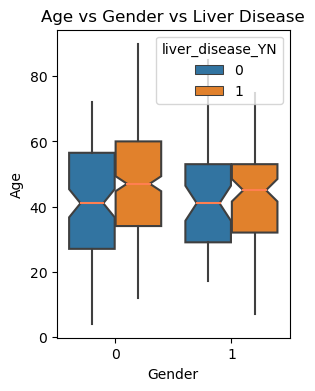

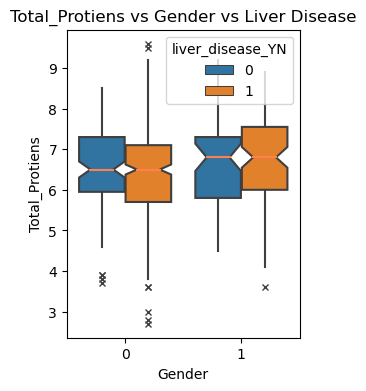

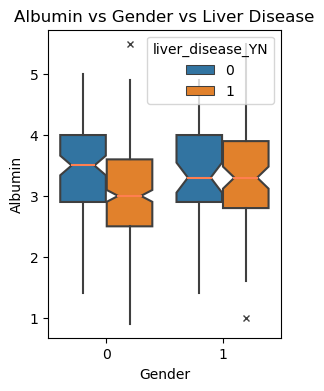

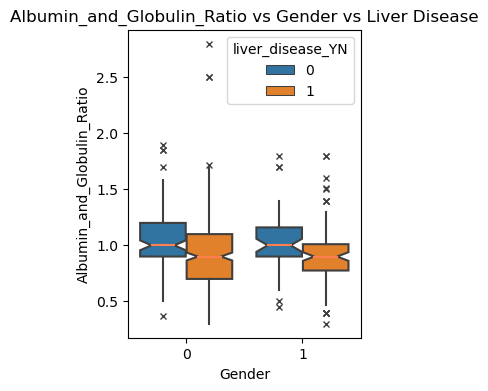

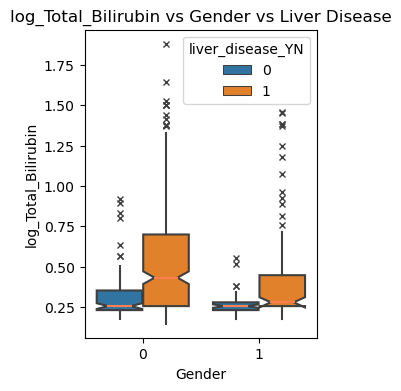

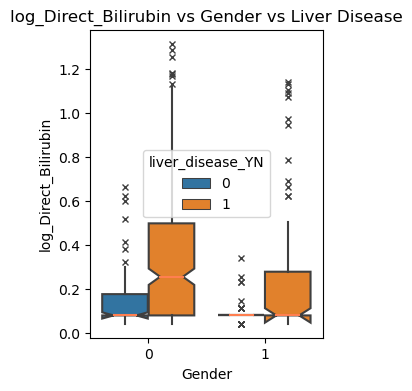

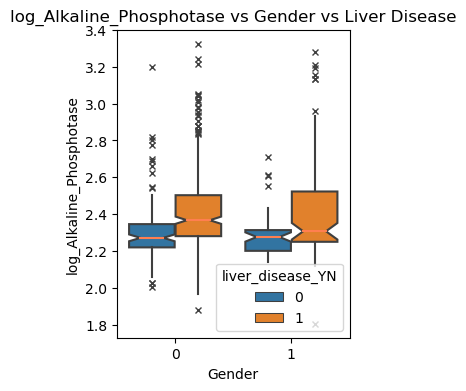

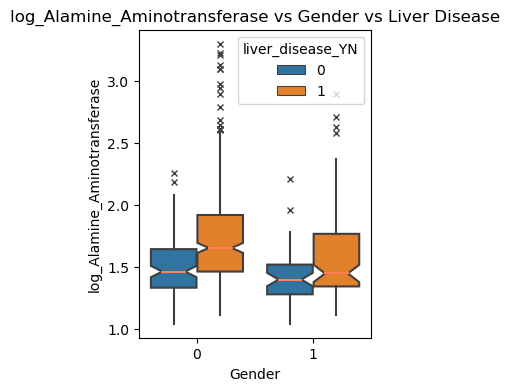

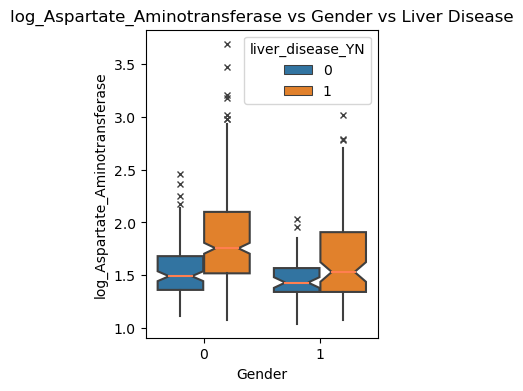

In [28]:
print(gender_replace_dict)

for feature in df.drop(['Gender', 'liver_disease_YN'],axis=1).columns:
    plt.figure(figsize=(3,4))
    sns.boxplot(df, x = 'Gender', y = feature, notch = True, flierprops={"marker": "x"},
                showcaps=False, medianprops={"color": "coral"}, hue = 'liver_disease_YN', dodge = True) #customizing the boxplots
    plt.title(f'{feature} vs Gender vs Liver Disease')
    fig.savefig(f'boxplot_{feature}_gender.png', bbox_inches='tight')
    
    plt.show();

#### Observations
1. Within each gender, feature medians tend to be higher for those with liver disease as opposed to healthy subjects. An excpetion to this is 2 features - Albumin, Albumin-Globulin ratio, where diseased subjects tend to score lower.

2. The feature 'Total_Protiens' doesn't provide additional insights within the gender groups, and across the target (diseased or not) groups.

3. There's too much of an overlap of the Inter Quartile Range of the barplots to infer conclusively, that any of the features influence liver disease for either genders. I suspect a one-way ANOVA test between the named groups would give different insights, so I'll move forward with the analysis.

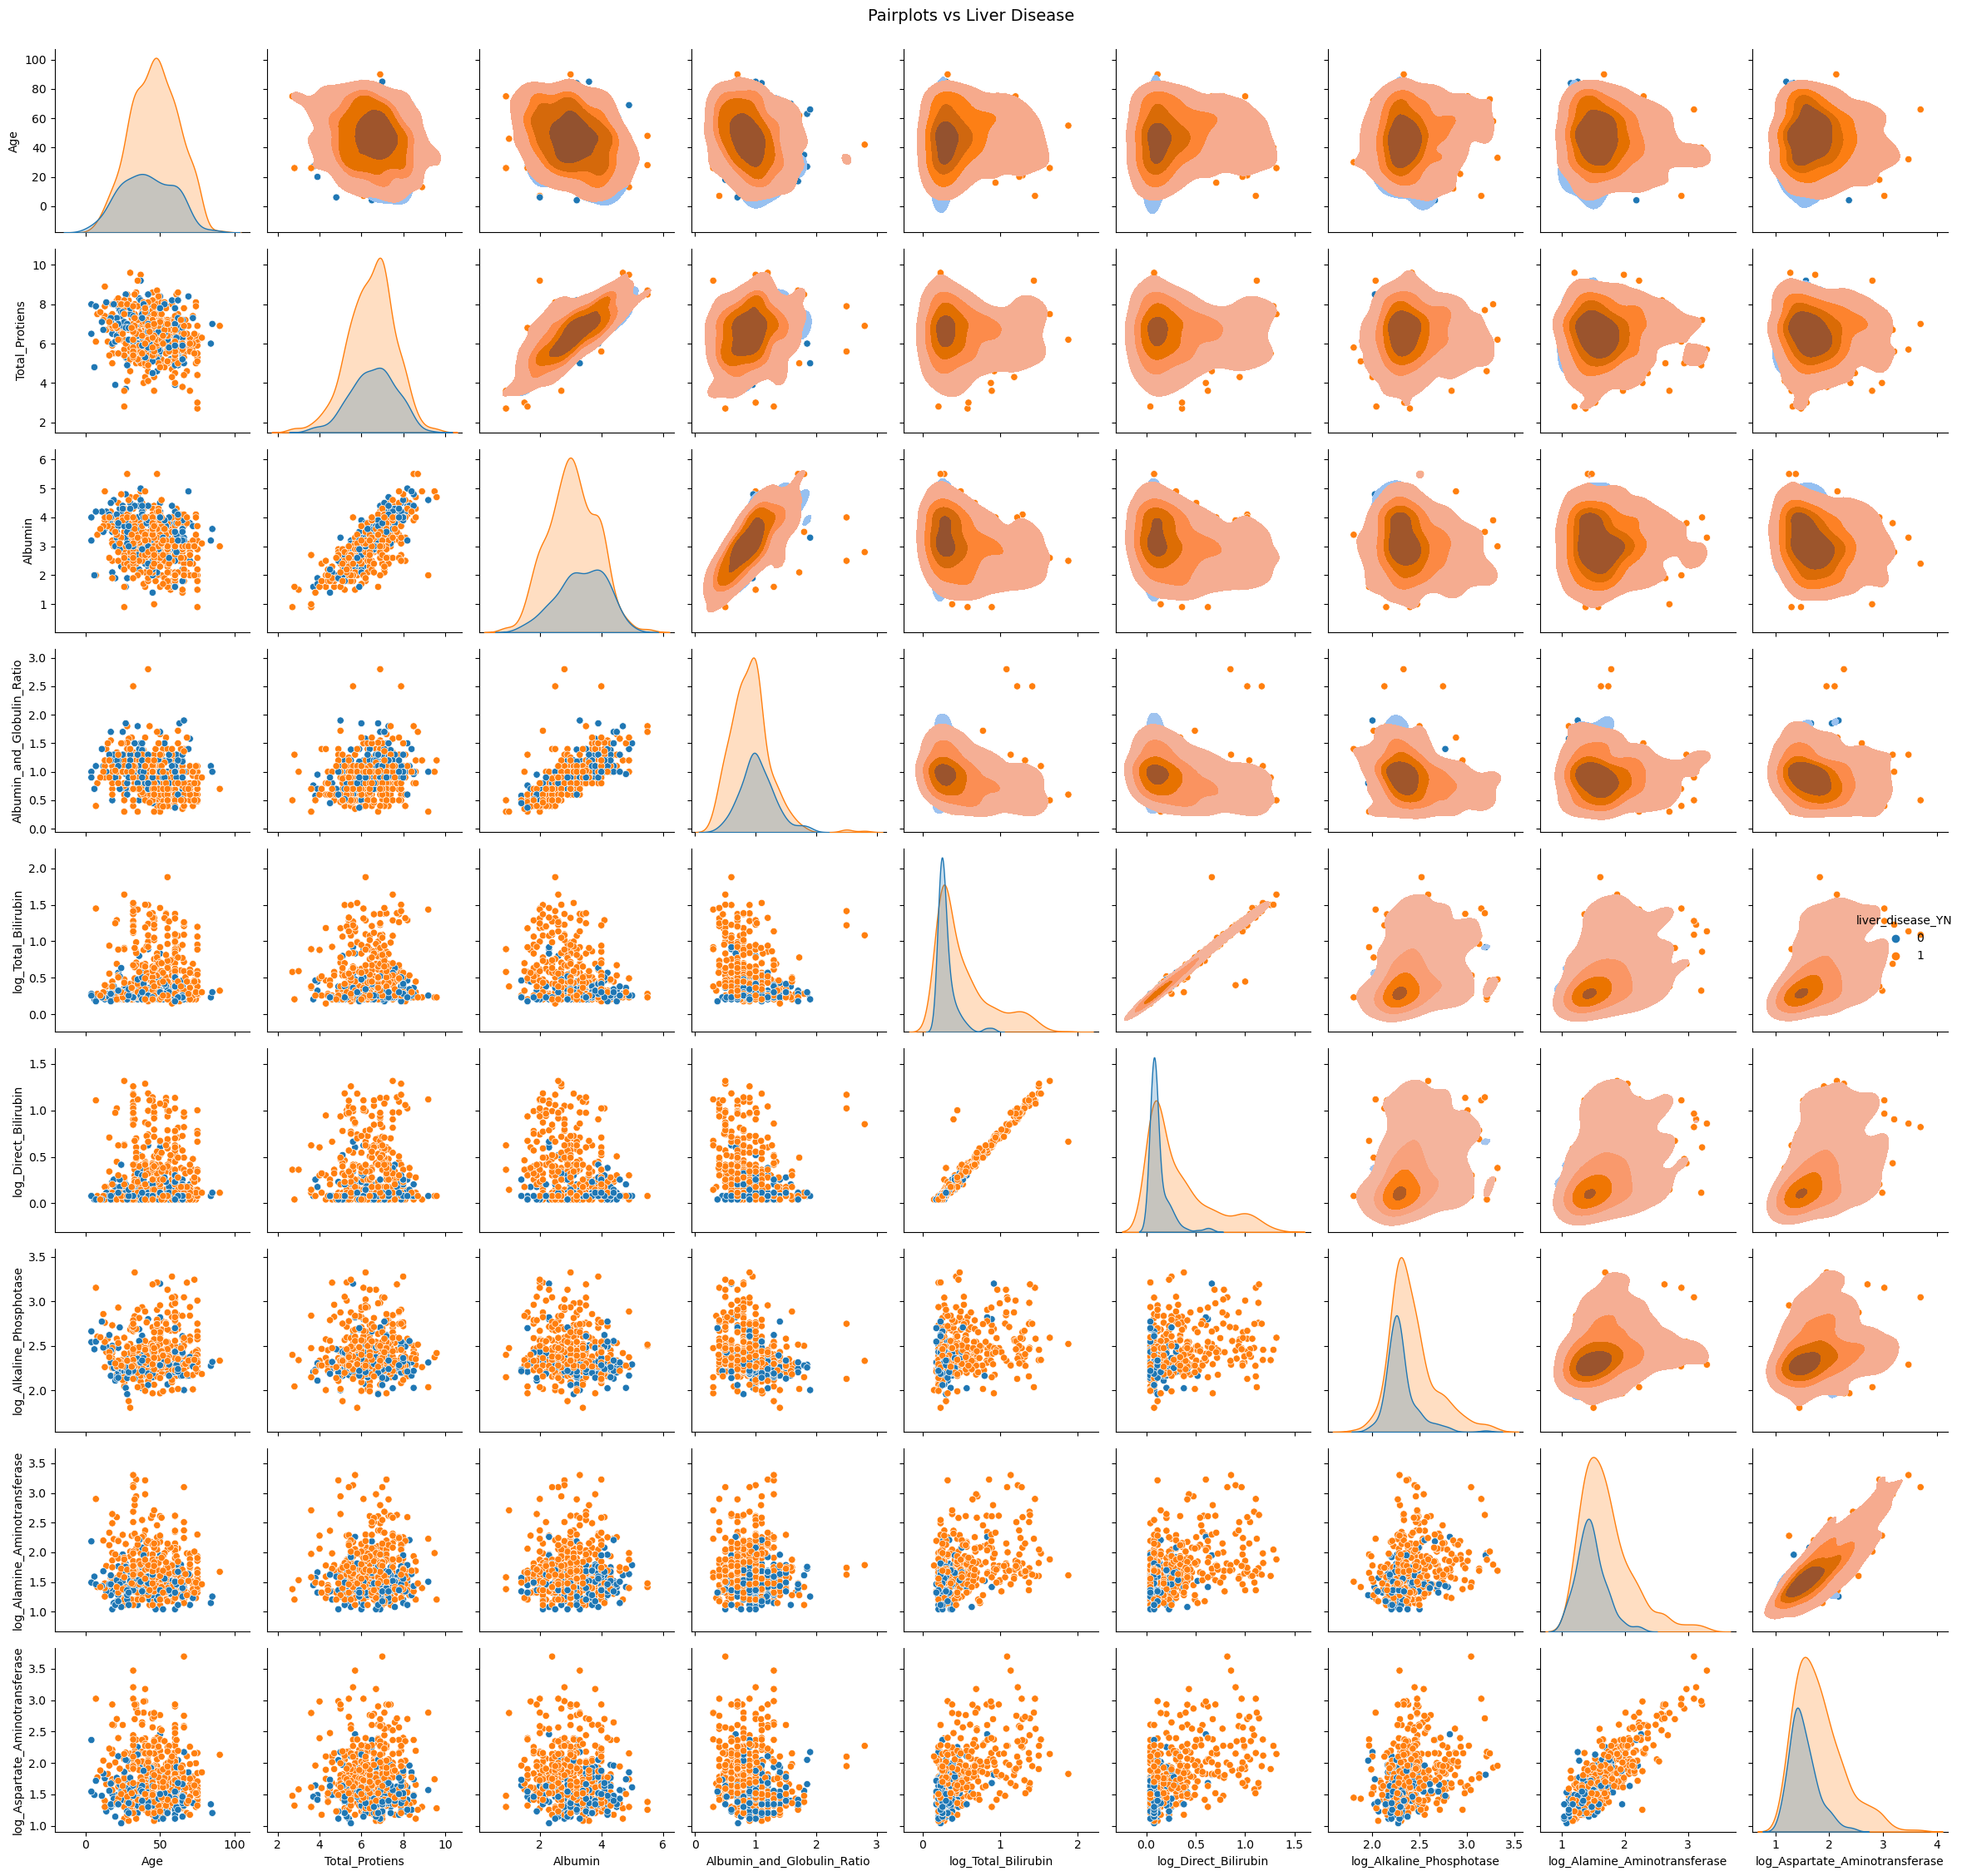

In [29]:
g = sns.pairplot(df.drop('Gender', axis = 1), hue = 'liver_disease_YN')
g.map_upper(sns.kdeplot, levels = 5, hue = df['liver_disease_YN'], fill = True)

plt.suptitle('Pairplots vs Liver Disease', fontsize = 14, y= 1)
fig.savefig('pairplot_ hue-liverdisease.png', bbox_inches='tight')
plt.tight_layout()
plt.show();

#### The pairplot reveals some interesting trends in the data.
1. Only 4 feature pairs exhibit a strong collinearity.
2. The remaining pairplots do not seem to show any trends.
3. There's no *visually distinct* clusters of target classes among any of the pairplots.

I will verify this with a correlation map.

In [30]:
def corr_map(df, title, method='spearman', numeric_only = True, tick_size = 10, annot_size=10, annot_kws=10):
    mask = np.triu(np.ones_like(df.corr(method=method,numeric_only=numeric_only), dtype=bool))
    heatmap = sns.heatmap(df.corr(method=method, numeric_only = numeric_only), fmt = '.2f',  annot = True, annot_kws = {'size': annot_kws}, mask=mask, cmap='BrBG')#
    plt.xticks(rotation=80, fontsize= tick_size)
    plt.yticks( fontsize= tick_size)
    
    fig.savefig(f'corrmap {title}.png', bbox_inches='tight')
    heatmap.set_title(title, fontdict={'fontsize':annot_size}, pad=12)
    plt.show();

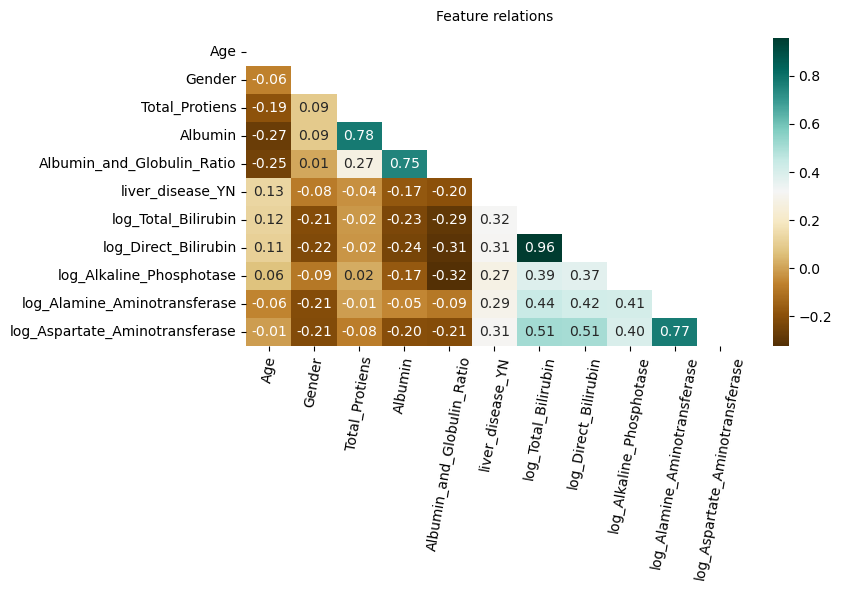

In [31]:
plt.figure(figsize=(8, 4))
corr_map(df, 'Feature relations')


#### As expected, 4 feature pairs (given below) are strongly correlated, with pair 3 having a near perfect positive correlation of 1.
    1. Albumin, Total_Protiens, 
    2. Albumin, Albumin_and_Globulin_Ratio,
    3. log_Total_Bilirubin, log_Direct_Bilirubin and
    4. log_Alamine_Aminotransferase, log_Aspartate_Aminotransferase

### Now that we've cleaned up our dataset and extracted some important insights and engineered the features, we will move on to model training and evaluation.

# 2.3 Model Training, Hyperparameter Tuning and Evaluation

In [32]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [33]:
X = df.drop('liver_disease_YN', axis =1)
y = df['liver_disease_YN']

In [34]:
# Initialize StratifiedKFold class
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

### Making predictions with imbalanced dataset

#### 1. AdaBoost Classifier

In [35]:
## Define parameter grids for GridSearchCV for AdaBoost Classifier
adaboost= AdaBoostClassifier()
adaboost_params = {'n_estimators':[215, 220, 225], 'learning_rate':[1.45, 1.5, 1.55, 1.6]}

## GridSearchCV for AdaBoost Classifier
ada_grid = GridSearchCV(adaboost, adaboost_params, cv = skf, scoring = 'precision') 
#setting scoing to precision so as to reduce False negatives in disease detection
ada_grid.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [1.45, 1.5, 1.55, 1.6],
                         'n_estimators': [215, 220, 225]},
             scoring='precision')

In [36]:
print(ada_grid.best_estimator_)
print('mean_test_score:\n',ada_grid.cv_results_['mean_test_score'])

AdaBoostClassifier(learning_rate=1.6, n_estimators=215)
mean_test_score:
 [0.75908229 0.75866276 0.75645126 0.76978096 0.76731566 0.76504555
 0.76112005 0.76467457 0.76318931 0.7706526  0.76984548 0.76591672]


#### 2. RandomForest Classifier

In [37]:
## Define parameter grids for GridSearchCV for RandomForest Classifier
randomforest = RandomForestClassifier()
rf_params = {'max_depth': [None, 20, 25, 26, 27, 28], 'n_estimators':[165, 170, 180, 190, 200, 220], 'warm_start':[True, False]}

## GridSearchCV for RandomForest Classifier
rf_grid = GridSearchCV(randomforest, rf_params, cv = skf, scoring = 'precision')
rf_grid.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 20, 25, 26, 27, 28],
                         'n_estimators': [165, 170, 180, 190, 200, 220],
                         'warm_start': [True, False]},
             scoring='precision')

In [38]:
print(rf_grid.best_estimator_)
print('mean_test_score:\n',rf_grid.cv_results_['mean_test_score'])

RandomForestClassifier(max_depth=28, n_estimators=220, warm_start=True)
mean_test_score:
 [0.75132247 0.75544787 0.74203555 0.74560406 0.75522846 0.75784703
 0.74697052 0.750039   0.7464363  0.75161171 0.75062204 0.75255079
 0.75348213 0.75146939 0.74064787 0.7583227  0.75302389 0.74333566
 0.75809785 0.74517455 0.746346   0.74660339 0.74789994 0.74733626
 0.74232789 0.74989623 0.74635833 0.75014238 0.74467089 0.74945824
 0.75716446 0.75843843 0.75282234 0.75365567 0.7509484  0.74358844
 0.73652853 0.75020275 0.75296841 0.74919051 0.74839125 0.75651265
 0.75314068 0.74690526 0.7513335  0.74449417 0.75423506 0.75845002
 0.75731759 0.75368479 0.74997196 0.75420798 0.74378728 0.75206165
 0.74922835 0.74672714 0.74827091 0.7501226  0.7439115  0.75126813
 0.74787676 0.74869957 0.75173583 0.74262927 0.74708075 0.75309749
 0.75013801 0.75504505 0.74693435 0.75173849 0.76286498 0.75654306]


#### Evaluation Summary

In [40]:
# Evaluate the models using cross-validation scores
adaboost_scores = ada_grid.cv_results_['mean_test_score']
random_forest_scores = rf_grid.cv_results_['mean_test_score']

# Print the cross-validation scores
print("Cross-validation scores for AdaBoostClassifier:")
print(adaboost_scores, '\n\n')
print("Cross-validation scores for RandomForestClassifier:")
print(random_forest_scores, '\n\n')

# Print the best parameters for each model
print("Best parameters for AdaBoostClassifier:", ada_grid.best_params_)
print("Best parameters for RandomForestClassifier:", rf_grid.best_params_)


Cross-validation scores for AdaBoostClassifier:
[0.75908229 0.75866276 0.75645126 0.76978096 0.76731566 0.76504555
 0.76112005 0.76467457 0.76318931 0.7706526  0.76984548 0.76591672] 


Cross-validation scores for RandomForestClassifier:
[0.75132247 0.75544787 0.74203555 0.74560406 0.75522846 0.75784703
 0.74697052 0.750039   0.7464363  0.75161171 0.75062204 0.75255079
 0.75348213 0.75146939 0.74064787 0.7583227  0.75302389 0.74333566
 0.75809785 0.74517455 0.746346   0.74660339 0.74789994 0.74733626
 0.74232789 0.74989623 0.74635833 0.75014238 0.74467089 0.74945824
 0.75716446 0.75843843 0.75282234 0.75365567 0.7509484  0.74358844
 0.73652853 0.75020275 0.75296841 0.74919051 0.74839125 0.75651265
 0.75314068 0.74690526 0.7513335  0.74449417 0.75423506 0.75845002
 0.75731759 0.75368479 0.74997196 0.75420798 0.74378728 0.75206165
 0.74922835 0.74672714 0.74827091 0.7501226  0.7439115  0.75126813
 0.74787676 0.74869957 0.75173583 0.74262927 0.74708075 0.75309749
 0.75013801 0.75504505 0.

In [41]:
np.mean(adaboost_scores), np.mean(random_forest_scores)

(0.7643114351712921, 0.75019754726603)

In [42]:
np.median(adaboost_scores), np.median(random_forest_scores)

(0.7648600617992221, 0.7501401939387481)

# 1.4 Final Report and Conclusion: Comparison of Estimators
 After multiple rounds of hyperparameter tuning and refitting, we have found that **Adaboost Classifier is marginally better than Random Forest Classifier**. 
 
 In GridSearchCV for both classifiers, I have chosen the value for **scoring as precision**, since my primary goal is **to minimize false negatives.** 

**Hyperparameter tuning** for both Classifiers has **improved mean precision scores of ~70% when fitted with default parameter values, to the the present values of 77% and 75% respectively.** There might be a scope for improvement in model scores with a different set of classifier algorithms such as XGBoost, LightGBM, CatBoost. 

The **low precision of <80% can be explained** by our observation during EDA that there's a **significant overlap in the IQR of the boxplots** among features, when grouped by Gender and Liver_disease_YN feature. The **pairplots and correlation heatmaps have reconfirmed** this: the scatters and kde plots show significant overlaps, and low correlation among feature pairs.

While there exists **an argument that model precision can be improved by augmenting the data** with synthetic datapoints, I'm not exploring these strategies for the following reasons: 
* Firstly, oversampling strategies like ADASYN, SMOTE or SMOTENC maynot work as they create point-bridges in the minority target class. We've observed that the minority and majority classes are **embedded and enmeshed deeply iside each other.** This is evident form the pairplots where distinct clusters are not visible. Using these may further deteriorate the predictive power of our model.
* Secondly, **undersampling causes a loss of information** as the dataset is small and so, this strategy is undesirable. 
* Lastly, I'm also not considering using the combination srategy of SMOTETomek since this too causes a loss in information in such a small dataset.

*If there is less of an overlap between the clusters based on target, intuition says,* **using BorderlineSMOTE with AdaBoost or its variant, the EasyEnsembleClassifier which uses AdaBoost as the base estimator will give a better model precision.** 

The below combinations are recommended for to be tested with different cross-validation strategies for determiniing the best estimators.

1. SMOTENC + AdaBoostClassifier
2. SMOTENC + RandomForestClassifier, 
3. BorderlineSMOTE + AdaBoostClassifier,
4. BorderlineSMOTE + RandomForestClassifier
5. EasyEnsembleClassifier
6. BalancedRandomForestClassifier